## Inference with Single Model

In [1]:
! pip install ../input/mmcvwhl/addict-2.2.1-py3-none-any.whl
! pip install ../input/mmcvwhl/mmcv-0.4.0-cp36-cp36m-linux_x86_64.whl
! pip install ../input/facenet-pytorch/facenet_pytorch-2.2.9-py3-none-any.whl
! pip install ../input/efficientnet-pytorch/efficientnet_pytorch-0.6.3-cp36-none-any.whl

Processing /kaggle/input/mmcvwhl/addict-2.2.1-py3-none-any.whl
Processing /kaggle/input/mmcvwhl/mmcv-0.4.0-cp36-cp36m-linux_x86_64.whl
Processing /kaggle/input/facenet-pytorch/facenet_pytorch-2.2.9-py3-none-any.whl
Processing /kaggle/input/efficientnet-pytorch/efficientnet_pytorch-0.6.3-cp36-none-any.whl


In [2]:
import cv2, mmcv
from base64 import b64encode
from IPython.display import display, HTML
from fastai.core import *
from fastai.vision import *
from sklearn.cluster import KMeans

sys.path.append('../input/realfakekode')
from kgl_deepfake.face_detection import *
from kgl_deepfake.EasyBlazeFace import EasyBlazeFace
from kgl_deepfake.EasyRetinaFace import EasyRetinaFace
from kgl_deepfake.EasyMTCNN import EasyMTCNN
#from kgl_deepfake.efficientnet import EfficientNet
from efficientnet_pytorch import EfficientNet

import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
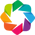

In [3]:
hv.extension('bokeh')

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## FAKE/REAL classifier

In [5]:
# Load our model and weights
model = EfficientNet.from_name('efficientnet-b1', override_params={'num_classes': 2})
state_dict = torch.load('../input/trained-models/cutmix_30ep.pth', map_location='cpu')
model.load_state_dict(state_dict['model'])
model = model.to(device)

## Face detector

In [6]:
easyBlazeFace = EasyBlazeFace(weights='../input/realfakekode/face_detection/blazeface.pth', 
                              anchors='../input/realfakekode/face_detection/anchors.npy')
easyRetinaFace = EasyRetinaFace(path='../input/realfakekode/face_detection/Pytorch_Retinaface/weights/Resnet50_Final.pth', 
                                cpu=False if device.type=='cuda' else True)
easyMTCNN = EasyMTCNN(path_pnet='../input/realfakekode/facenet_pytorch/data/pnet.pt',
                      path_rnet='../input/realfakekode/facenet_pytorch/data/rnet.pt',
                      path_onet='../input/realfakekode/facenet_pytorch/data/onet.pt')

Loading pretrained model from ../input/realfakekode/face_detection/Pytorch_Retinaface/weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456


## Data

In [7]:
def get_top_loss(vant, path_raw_pred):
    '''
    Sort previously inferred videos by their loss values, and return the top losses.
    '''
    raw_pred = np.load(path_raw_pred, allow_pickle=True).item()
    vns = list(raw_pred.keys())
    median_prob = [np.median(raw_pred[vn]) for vn in vns]    
    dfvids = pd.DataFrame({'fname':vns, 'median_prob':median_prob})
    dfvids['label'] = dfvids.fname.apply(lambda o: vant.label[vant.fname==o].values[0])
    dfvids['target'] = dfvids.label.apply(lambda o: 1 if o=='FAKE' else 0)
    dfvids['bce'] = dfvids.apply(lambda o: -np.log(o.median_prob) if o.target==1 else -np.log(1 - o.median_prob), axis=1)
    # Above equivalent to:
    # with torch.no_grad():
    #     dfvids['bce'] = dfvids.apply(lambda o: loss_func(tensor(o.median_prob), tensor(o.target).float()), axis=1)
    dfvids_toploss = dfvids.sort_values('bce', axis=0, ascending=False).iloc[:].reset_index(drop=True)
    return dfvids_toploss

In [8]:
def show_video(fname):
    vid1 = open(fname,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(vid1).decode()
    display(HTML("""
    <video width=600 controls>
          <source src="%s" type="video/mp4">
    </video>
    """ % data_url))

In [9]:
# list of videos with 2 people
# twopeeps = ['pcoxcmtroa.mp4', 'sbzhqdbslb.mp4', 'lclrhuuwnj.mp4']

In [10]:
# SOURCE_TEST = Path('../input/deepfake-detection-challenge/test_videos/')
# submission = pd.read_csv('../input/deepfake-detection-challenge/sample_submission.csv')
SOURCE_TEST = Path('../input/cropped-faces/cropped_faces/valid_videos/')

In [11]:
vant = pd.read_csv('../input/cropped-faces/cropped_faces/valid.csv')

In [12]:
dfvids_toploss = get_top_loss(vant, '../input/valid-videos-raw-preds/raw_preds_cutmix30.npy')
dfvids_toploss.head(3)

fname  median_prob label  target       bce
0  ugzpmmyogi.mp4     0.001879  FAKE       1  6.276995
1  ehrtdalgon.mp4     0.002394  FAKE       1  6.034939
2  czupmkgroe.mp4     0.002684  FAKE       1  5.920355

In [13]:
show_video(SOURCE_TEST/dfvids_toploss.fname[0])

## Definitions

In [14]:
def vid2frames(vid, iframes):
    idx_frames = ((i, o) for i, o in enumerate(vid) if i in iframes)
    iframes, frames = zip(*idx_frames)
    frames = [cv2.cvtColor(o, cv2.COLOR_BGR2RGB) for o in frames]
    return iframes, frames

from facenet_pytorch.models.utils.detect_face import extract_face
def extract_faces_from_frame(frame, det, image_size=256, margin=20):
    '''
    Adpated from facenet_pytorch.
    '''
    if len(det.shape) == 1: return torch.Tensor([])
    im, box_im = PIL.Image.fromarray(frame), det[:,:4]
    faces_im = []
    for i, box in enumerate(box_im):
        face = extract_face(im, box, image_size, margin)
        faces_im.append(face)
    faces_im = torch.Tensor([]) if not faces_im else torch.stack(faces_im) 
    return faces_im

def get_faces_vid(frames, detector):
    dets = detector.detect_on_multiple_frames(frames)
    faces_vid = []
    for f, d in zip(frames, dets):
        faces_frame = extract_faces_from_frame(f, d, margin=20)
        faces_vid.append(faces_frame)
    return torch.cat(faces_vid)

mean_norm = tensor(imagenet_stats[0])
std_norm = tensor(imagenet_stats[1])

def predict_faces_vid(faces_vid):
    xb = faces_vid / 255
    xb = xb.sub_(mean_norm[None,:,None,None]).div_(std_norm[None,:,None,None])
    xb = xb.to(device)
    model.eval()
    with torch.no_grad(): 
        pred = torch.softmax(model(xb), axis=-1).detach().cpu().numpy()
    return pred

def fix_prob(prob, fk_ccenter=.5, fk_ffrac=.15):
    km = KMeans(n_clusters=2); km.fit(prob[...,None])
    ccs = km.cluster_centers_.reshape(-1)
    cfs = np.array([(km.labels_==i).mean() for i in range_of(ccs)])
    if ccs.max() > fk_ccenter and cfs[ccs.argmax()] > fk_ffrac: vid_is_fake = True
    else: vid_is_fake = False
    res = prob.copy()
    if vid_is_fake: res[km.labels_==ccs.argmin()] = ccs.max()
    else: res[km.labels_==ccs.argmax()] = ccs.min()
    return vid_is_fake, res

def agg_probs(probs): return np.median(probs)#probs.mean()

def predict_vids(vns, detector=easyMTCNN, nface_min=10):
    probs_vid = []
    pb = progress_bar(vns)
    for vn in pb:
        vn = SOURCE_TEST/vn
        try:
            vid = mmcv.VideoReader(str(vn))
            iframes = np.sort(np.random.randint(low=0, high=len(vid), size=32))
            iframes, frames = vid2frames(vid, iframes)
            faces = get_faces_vid(frames, detector)
            if len(faces) < nface_min: faces = get_faces_vid(frames, easyRetinaFace)
            if len(faces) < nface_min: prob = .5
            else:
                prob = predict_faces_vid(faces)[:,0]
                vid_is_fake, prob = fix_prob(prob)
                prob = agg_probs(prob)
            pb.comment = f'Aggregated probability: {prob}'
            probs_vid.append(prob)
        except Exception as e:
            print(vn); print(e)
            probs_vid.append(.5)
    return np.array(probs_vid)

def hv_faces(faces, probs=None):
    if probs is not None: assert len(faces)==len(probs)
    figs = []
    for i in range_of(faces):
        im_npy = faces[i].permute(1, 2, 0).type(torch.uint8).numpy()
        fig = hv.RGB(im_npy)
        if probs is not None: fig *= hv.Text(.35, .45, f'{probs[i]:.4f}')
        figs.append(fig)

    return hv.Layout(figs).cols(8).opts(hv.opts.RGB(xaxis=None, yaxis=None, width=150, height=150),
                                        hv.opts.Text(color='cyan', text_font_size='7.5pt'))

## Inference on all videos

In [15]:
vns = dfvids_toploss.fname
detector = easyMTCNN
nface_min = 20

probs_vid = predict_vids(vns, detector, nface_min=nface_min)

## Evaluation

In [16]:
dfvids_toploss['fixed_median_prob'] = probs_vid
dfvids_toploss['fixed_bce'] = dfvids_toploss.apply(lambda o: -np.log(o.fixed_median_prob) if o.target==1 
                                                   else -np.log(1-o.fixed_median_prob), axis=1)

In [17]:
dfvids_toploss

fname  median_prob label  target       bce  fixed_median_prob  \
0     ugzpmmyogi.mp4     0.001879  FAKE       1  6.276995           0.515915   
1     ehrtdalgon.mp4     0.002394  FAKE       1  6.034939           0.085303   
2     czupmkgroe.mp4     0.002684  FAKE       1  5.920355           0.008276   
3     gnnbtnjqto.mp4     0.002743  FAKE       1  5.898823           0.856266   
4     lvomvkrszu.mp4     0.003035  FAKE       1  5.797603           0.059657   
...              ...          ...   ...     ...       ...                ...   
1143  tnecbhfzba.mp4     0.999765  FAKE       1  0.000235           0.998718   
1144  zltwghgilz.mp4     0.999778  FAKE       1  0.000222           0.994429   
1145  gjxfowkaeo.mp4     0.999813  FAKE       1  0.000187           0.945971   
1146  umpscxhfsk.mp4     0.999847  FAKE       1  0.000153           0.999667   
1147  enhiqdvfpu.mp4     0.999848  FAKE       1  0.000152           0.999730   

      fixed_bce  
0      0.661813  
1      2.461545  
2      4.794347  
3      0.155174  
4      2.819141  
...         ...  
1143   0.001283  
1144   0.005587  
1145   0.055544  
1146   0.000334  
1147   0.000270  

[1148 rows x 7 columns]

In [18]:
print(f'''
Using KMeans.
BCELoss before: {dfvids_toploss.bce.mean()}
BCELoss after: {dfvids_toploss.fixed_bce.mean()}
''')


Using KMeans.
BCELoss before: 0.4159091078168364
BCELoss after: 0.4056842243000317



In [19]:
# pd.Series(np.array(probs_vid)).hist();

In [20]:
# labels = vant.set_index('fname').loc[vns].label
# targets = labels.apply(lambda o: 1 if o=='FAKE' else 0).values
# loss_func = nn.BCELoss()
# with torch.no_grad(): loss = loss_func(tensor(probs_vid), tensor(targets).float())

## Write submission-format .csv

In [21]:
# df_vids = pd.DataFrame({'filename':vns, 'label':probs_vid})
# df_vids.to_csv('submission.csv', index=False)